In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [95]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [98]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0, 0.5, 'Minimum temperature')

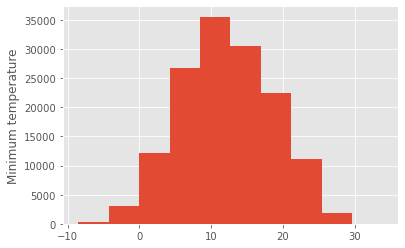

In [18]:
plt.hist(df["MinTemp"]);
plt.ylabel("Minimum temperature")

Text(0, 0.5, 'Maximum temperature')

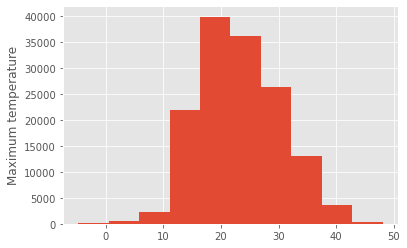

In [29]:
plt.hist(df["MaxTemp"]);
plt.ylabel("Maximum temperature")

(0.0, 20.0)

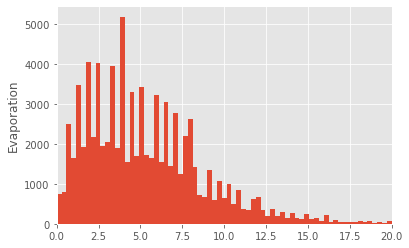

In [31]:
plt.hist(df["Evaporation"], bins = 500);
plt.ylabel("Evaporation")
plt.xlim(0,20)

In [28]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [75]:
df1 = df.copy(deep= True)
df1 = df1[~df1["RainTomorrow"].isna()]

In [76]:
print(df.shape)
print(df1.shape)

(145460, 23)
(142193, 23)


(0.0, 20.0)

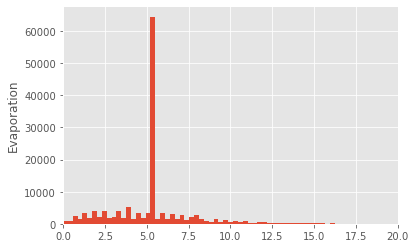

In [51]:
df1["Evaporation"] = df1["Evaporation"].replace(np.NaN, df1["Evaporation"].mean())
plt.hist(df1["Evaporation"], bins = 500);
plt.ylabel("Evaporation")
plt.xlim(0,20)

In [73]:
# Replacing Nans with mode values and medians in case of integers.
for i in list(df1):
    print(i)
    if df1[df1[i].isna()].shape[0] !=0:
        if df1[i].dtype == 'O':
            df1[i] = df1[i].mode()[0]
        else:
            df1[i] = df1[i].replace(np.NaN, df1[i].mean())

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RainTomorrow


In [79]:
df1["Month"] = pd.to_numeric(df1["Date"].str.split("-", expand = True)[1])

Text(0.5, 0, 'Month')

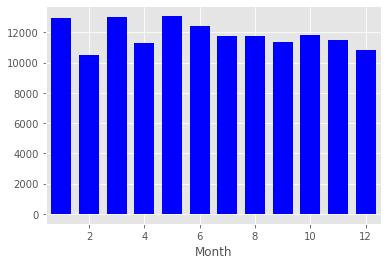

In [91]:
v, c = np.unique(df1["Month"], return_counts =True)
plt.vlines(v, 0, c, color = 'blue', lw = 20)
plt.xlabel("Month")

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for i in list(df):
    if df[i].dtype == 'O':
        le.fit(df1[i]) 
        df1[i]=le.transform(df1[i]) 

In [104]:
df1.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,142193.0,142193.0,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,142193.0,132923.000000,142193.0,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.0,142193.0,142193.000000
mean,0.0,0.0,12.186400,23.226784,2.349974,5.469824,7.624853,0.0,39.984292,0.0,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.0,0.0,6.402544
std,0.0,0.0,6.403283,7.117618,8.465173,4.188537,3.781525,0.0,13.588801,0.0,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.0,0.0,3.426506
min,0.0,0.0,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.0,6.000000,0.0,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.0,0.0,1.000000
25%,0.0,0.0,7.600000,17.900000,0.000000,2.600000,4.900000,0.0,31.000000,0.0,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.0,0.0,3.000000
50%,0.0,0.0,12.000000,22.600000,0.000000,4.800000,8.500000,0.0,39.000000,0.0,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.0,0.0,6.000000
75%,0.0,0.0,16.800000,28.200000,0.800000,7.400000,10.600000,0.0,48.000000,0.0,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.0,0.0,9.000000
max,0.0,0.0,33.900000,48.100000,371.000000,145.000000,14.500000,0.0,135.000000,0.0,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,0.0,0.0,12.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier